In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from py_helpers import *

labs = True

if labs:
    # Define the path with the csv files
    report_plots_path = "/media/hsa22/Expansion/Brain-MINDS/processed_dMRI/MRTRIX/A6DR-R01_0083-TT56/report_plots"
else:
    # Define the path with the csv files
    report_plots_path = "D:\\Brain-MINDS\\processed_dMRI\\MRTRIX\\A6DR-R01_0083-TT56\\report_plots"

In [2]:
# Grab all the csv files in the path
csv_files = glob_files(report_plots_path, "csv")

# Define a data store
data_store = {
    "unoptimized": [],
    "optimized": []
}

# Define a function to determine the atlas type
def determine_atlas_type(file):
    if "MBCA" in file:
        return "MBCA"
    elif "MBM" in file:
        return "MBM"
    return None

# Load the csv files into the data store
for file in csv_files:
    atlas_type = determine_atlas_type(file)
    data = {
        "path": file,
        "data_array": np.log(np.genfromtxt(file, delimiter=",") + 1),
        "atlas_type": atlas_type
    }
    if "unoptimized" in file:
        data_store["unoptimized"].append(data)
    elif "optimized" in file:
        data_store["optimized"].append(data)

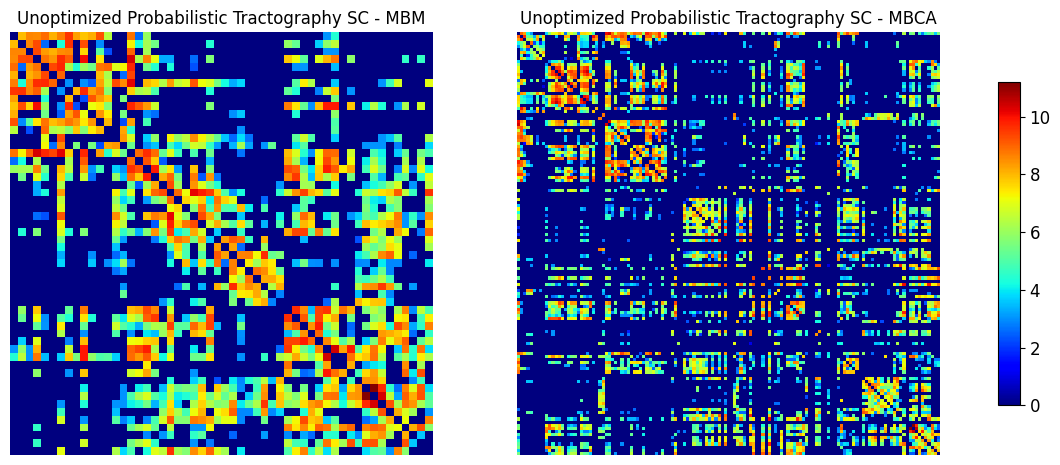

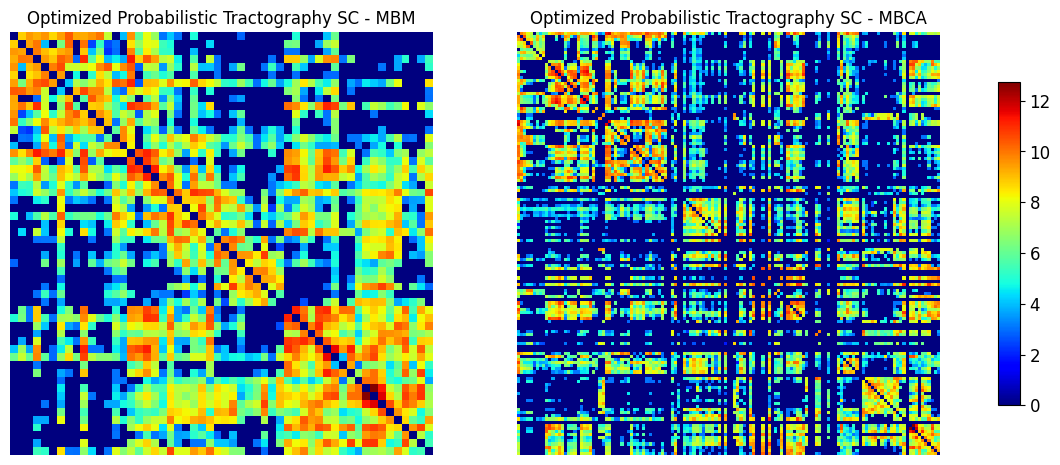

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data_store):
    
    # Define a helper function to get data arrays
    def get_data_arrays(optimization, atlas):
        return [entry["data_array"] for entry in data_store[optimization] if entry["atlas_type"] == atlas]

    # Define a helper function to determine common vmin and vmax for a given set of data arrays
    def get_vmin_vmax(data_arrays):
        vmin = min([np.min(data) for data in data_arrays])
        vmax = max([np.max(data) for data in data_arrays])
        return vmin, vmax

    # Prepare data for plotting
    unoptimized_MBM = get_data_arrays("unoptimized", "MBM")
    unoptimized_MBCA = get_data_arrays("unoptimized", "MBCA")
    optimized_MBM = get_data_arrays("optimized", "MBM")
    optimized_MBCA = get_data_arrays("optimized", "MBCA")

    # Plot data for unoptimized
    fig_unopt, axes_unopt = plt.subplots(1, 2, figsize=(15, 6))
    vmin_unopt, vmax_unopt = get_vmin_vmax(unoptimized_MBM + unoptimized_MBCA)
    
    for i, data in enumerate(unoptimized_MBM):
        im_unopt_0 = axes_unopt[0].imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin_unopt, vmax=vmax_unopt)
    axes_unopt[0].set_title(f'Unoptimized Probabilistic Tractography SC - MBM')
    axes_unopt[0].axis('off')
    
    for i, data in enumerate(unoptimized_MBCA):
        im_unopt_1 = axes_unopt[1].imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin_unopt, vmax=vmax_unopt)
    axes_unopt[1].set_title(f'Unoptimized Probabilistic Tractography SC - MBCA')
    axes_unopt[1].axis('off')

    # Add colorbar for unoptimized figure
    cbar_unopt = fig_unopt.colorbar(im_unopt_0, ax=axes_unopt.ravel().tolist(), shrink=0.7, aspect=15)
    cbar_unopt.ax.tick_params(labelsize=12)  # Increase tick label size for better visibility

    # Plot data for optimized
    fig_opt, axes_opt = plt.subplots(1, 2, figsize=(15, 6))
    vmin_opt, vmax_opt = get_vmin_vmax(optimized_MBM + optimized_MBCA)
    
    for i, data in enumerate(optimized_MBM):
        im_opt_0 = axes_opt[0].imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin_opt, vmax=vmax_opt)
    axes_opt[0].set_title(f'Optimized Probabilistic Tractography SC - MBM')
    axes_opt[0].axis('off')
        
    for i, data in enumerate(optimized_MBCA):
        im_opt_1 = axes_opt[1].imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin_opt, vmax=vmax_opt)
    axes_opt[1].set_title(f'Optimized Probabilistic Tractography SC - MBCA')
    axes_opt[1].axis('off')

    # Add colorbar for optimized figure
    cbar_opt = fig_opt.colorbar(im_opt_0, ax=axes_opt.ravel().tolist(), shrink=0.7, aspect=15)
    cbar_opt.ax.tick_params(labelsize=12)  # Increase tick label size for better visibility

    plt.show()

# Use the function
plot_data(data_store)

#### **Density of Each**

In [15]:
import networkx as nx

# Function to create a graph for every connectome and remove self-loops
def create_graph(connectome):

    # Create a graph
    graph = nx.Graph(connectome)
    
    # Remove self-loops
    graph.remove_edges_from(nx.selfloop_edges(graph))


    # Return the dictionary
    return graph

# Get the actual connectome data
def get_data_arrays(optimization, atlas):
    return [entry["data_array"] for entry in data_store[optimization] if entry["atlas_type"] == atlas]

# Prepare data for plotting
unoptimized_MBM = get_data_arrays("unoptimized", "MBM")[0]
unoptimized_MBCA = get_data_arrays("unoptimized", "MBCA")[0]
optimized_MBM = get_data_arrays("optimized", "MBM")[0]
optimized_MBCA = get_data_arrays("optimized", "MBCA")[0]

# Create a dictionary of graphs
unoptimized_graphs = {"MBM": create_graph(unoptimized_MBM), "MBCA": create_graph(unoptimized_MBCA)}
optimized_graphs = {"MBM": create_graph(optimized_MBM), "MBCA": create_graph(optimized_MBCA)}

print("Number of nodes in unoptimized MBM graph: {}".format(len(unoptimized_graphs["MBM"].nodes())))
print("Number of nodes in optimized MBM graph: {}".format(len(optimized_graphs["MBM"].nodes())))

Number of nodes in unoptimized MBM graph: 54
Number of nodes in optimized MBM graph: 54


In [16]:
# Compute the density of the graphs
def compute_density(graph):

    # Compute the density
    density = nx.density(graph)

    # Return the dictionary
    return density

# Compute the density of the graphs
unoptimized_density = {"MBM": compute_density(unoptimized_graphs["MBM"]), "MBCA": compute_density(unoptimized_graphs["MBCA"])}
optimized_density = {"MBM": compute_density(optimized_graphs["MBM"]), "MBCA": compute_density(optimized_graphs["MBCA"])}

print("Density of unoptimized MBM graph: {}".format(unoptimized_density["MBM"]))
print("Density of unoptimized MBCA graph: {}".format(unoptimized_density["MBCA"]))
print("-"*50)
print("Density of optimized MBM graph: {}".format(optimized_density["MBM"]))
print("Density of optimized MBCA graph: {}".format(optimized_density["MBCA"]))

Density of unoptimized MBM graph: 0.4647099930118798
Density of unoptimized MBCA graph: 0.25970149253731345
--------------------------------------------------
Density of optimized MBM graph: 0.7037037037037037
Density of optimized MBCA graph: 0.4299613045881703
